skipping: singleton_count_mean = 0.0, singleton_count_std = 0.0,  snv_count = 0


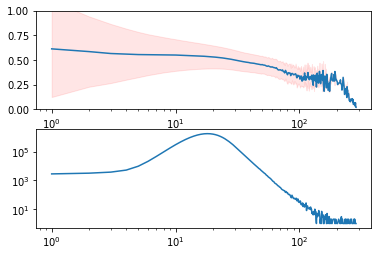

In [38]:
import numpy as np 
np.seterr(all='raise')

import sys
sys.path.append('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/utilities')

from read_model import read_model 
model = read_model('/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools/dist/model-germline-grch38.json')

xs, ys1, ys2, ys3 = [], [], [], []
for snv_count, window_counts in model['singletonCounts'].items(): 
  # https://stackoverflow.com/a/50786849/6674256
  singleton_counts = np.arange(0, snv_count+1)
  singleton_count_mean, window_count = np.average(singleton_counts, weights=window_counts, returned=True)
  singleton_count_variance = np.average((singleton_counts - singleton_count_mean)**2, weights=window_counts)
  singleton_count_std = np.sqrt(singleton_count_variance)
  try:
    singleton_fraction_mean = singleton_count_mean/snv_count
    singleton_fraction_std = singleton_count_std/snv_count
  except FloatingPointError: 
    print(
      f'skipping: '
      f'singleton_count_mean = {singleton_count_mean}, '
      f'singleton_count_std = {singleton_count_std}, ',
      f'snv_count = {snv_count}'
    )
    continue 
  xs.append(snv_count)
  ys1.append(singleton_fraction_mean)
  ys2.append(singleton_fraction_std)
  ys3.append(window_count)

xs, ys1, ys2, ys3 = map(np.array, zip(*sorted(zip(xs, ys1, ys2, ys3), key=lambda triplet: triplet[0])))

import matplotlib.pyplot as plt 
axis1 = plt.subplot(2, 1, 1)
axis2 = plt.subplot(2, 1, 2, sharex=axis1)
axis1.plot(xs, ys1)
axis1.fill_between(
  xs, 
  ys1 - ys2, 
  ys1 + ys2, 
  color='red', 
  alpha=.1,
  label='XXX'
)
axis1.set_xscale('log')
axis1.set_ylim([0, 1])
axis2.plot(xs, ys3)
axis2.set_yscale('log')



In [ ]:
# similar to correlation between snv count and singleton fraction that others have observed .... which is a nice sanity check 

# correlation of singleton fraction with snv count (top plot) suggests that negative and positive selection are acting in non-coding genome 
# compare with corresponding plot from neutral evolution simulations 
# what are the implications for how to construct the null model??? (revisit model spec)
# TODO: for each snv-count, compute (singleton_fraction, number of windows), and plot those pairs, demonstrating that they are correlated too! 
# TODO: can this analysis  be used to call natural selection??
# similar to how Q-Q plots are used to call significant events ???
# TODO: think through how this analysis relates to the conditioning on interval length 
# that I described in model spec (see picture that appears in https://github.com/quinlan-lab/constraint-tools/blob/main/define-model/germline-model.ipynb
